In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset 
arrests_df = pd.read_csv('UsArrests.csv')
arrests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [3]:
# Select duplicate rows of all columns
df_duplicates = arrests_df[arrests_df.duplicated()]
print(df_duplicates)


Empty DataFrame
Columns: [City, Murder, Assault, UrbanPop, Rape]
Index: []


In [4]:
# check if there are any more missing values
arrests_df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<AxesSubplot:>

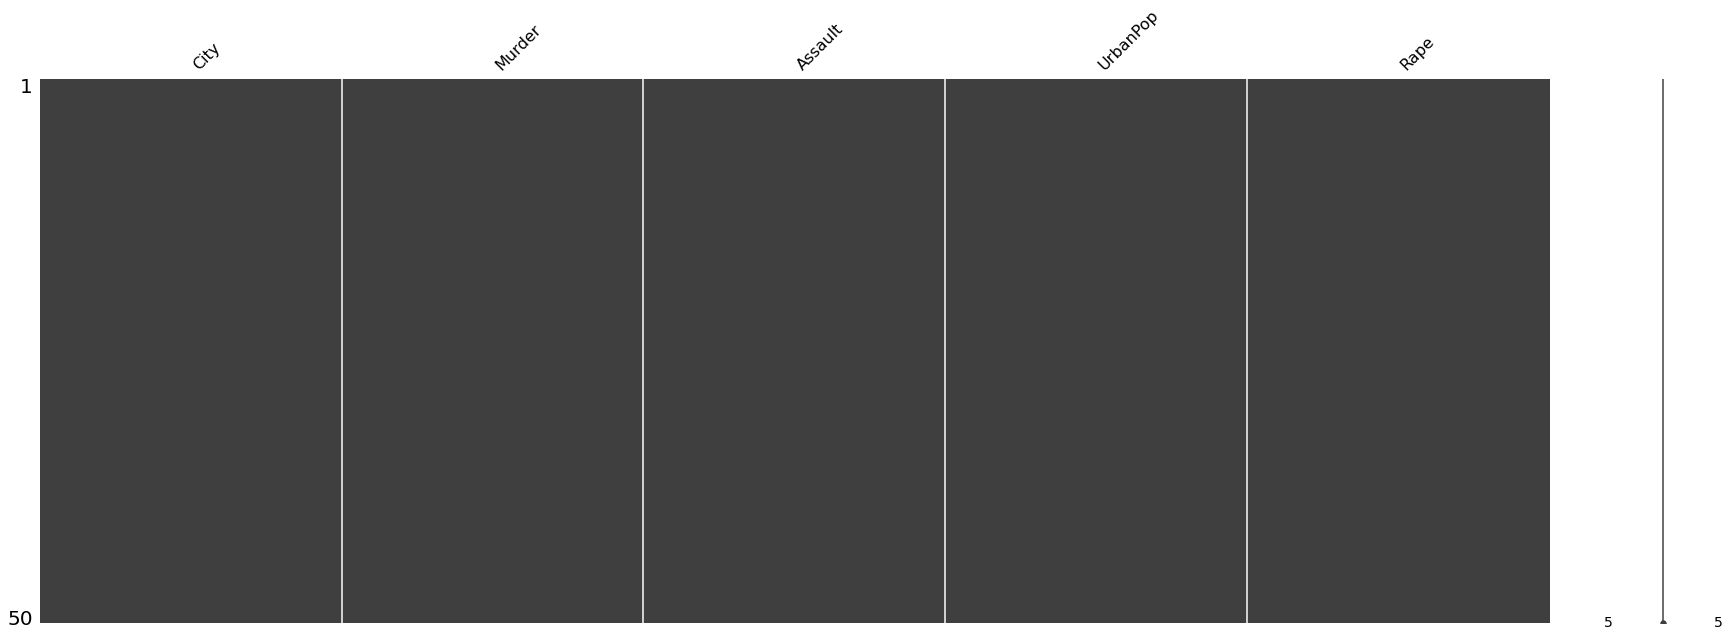

In [5]:
# Plot graphic of missing values
missingno.matrix(arrests_df, figsize = (30,10))

In [6]:
# change the city from object data type to string.
arrests_df['City'] = arrests_df['City'].astype("string")
arrests_df.dtypes

City         string
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [7]:
# Make sure that the cities have unique names
print(arrests_df.City.unique())

<StringArray>
[       'Alabama',         'Alaska',        'Arizona',       'Arkansas',
     'California',       'Colorado',    'Connecticut',       'Delaware',
        'Florida',        'Georgia',         'Hawaii',          'Idaho',
       'Illinois',        'Indiana',           'Iowa',         'Kansas',
       'Kentucky',      'Louisiana',          'Maine',       'Maryland',
  'Massachusetts',       'Michigan',      'Minnesota',    'Mississippi',
       'Missouri',        'Montana',       'Nebraska',         'Nevada',
  'New Hampshire',     'New Jersey',     'New Mexico',       'New York',
 'North Carolina',   'North Dakota',           'Ohio',       'Oklahoma',
         'Oregon',   'Pennsylvania',   'Rhode Island', 'South Carolina',
   'South Dakota',      'Tennessee',          'Texas',           'Utah',
        'Vermont',       'Virginia',     'Washington',  'West Virginia',
      'Wisconsin',        'Wyoming']
Length: 50, dtype: string


In [8]:
# statistics summary
arrests_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


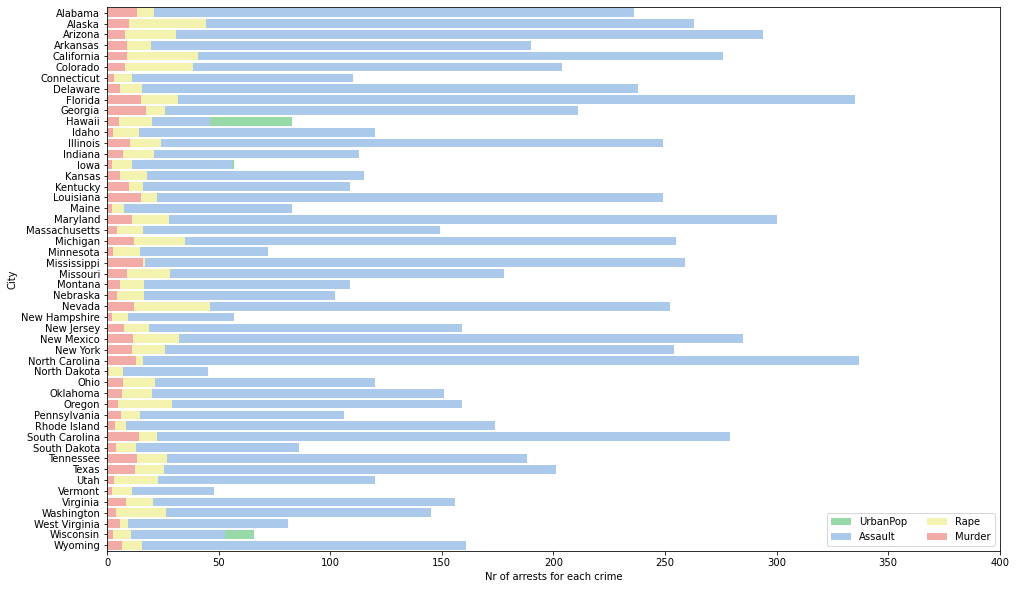

In [9]:
f, ax = plt.subplots(figsize=(16, 10))

sns.set_color_codes("pastel")

sns.barplot(x="UrbanPop", y="City", data=arrests_df,
            label="UrbanPop", color="g")

sns.barplot(x="Assault", y="City", data=arrests_df,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=arrests_df,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=arrests_df,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

# Findings
New York City and Florida City have the highest Assualt arrests.
Nevada, Alaska and California have the highest Rape arrests.
Georgia and Mississippi have the highest Murder arrests.
Hawahii and Wisconsin have the highest UrbanPop arrests.

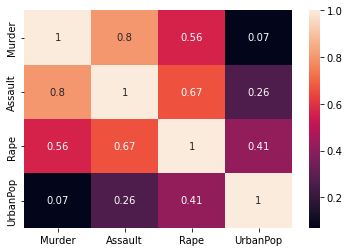

<function matplotlib.pyplot.close(fig=None)>

In [10]:
variables_correlation = arrests_df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
sns.heatmap(variables_correlation.corr(), annot=True)
plt.show()
plt.close

# Findings
Murder and Assualt have the strongest correlation and Murder and UrbanPop hve the weakest.